In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install rockpool

In [4]:
! pip install "rockpool[all]"

In [5]:
# ==== 1. Importing Dependencies and Hardware Configuration ====
import torch
import numpy as np
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from rockpool.nn.networks import SynNet
from torch.optim import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ==== 2. loading data ====
X_train = torch.from_numpy(np.load("/content/drive/My Drive/SD-project/data/newdata/X_train.npy")).float()
y_train = torch.from_numpy(np.load("/content/drive/My Drive/SD-project/data/newdata/y_train.npy")).long()
X_val = torch.from_numpy(np.load("/content/drive/My Drive/SD-project/data/newdata/X_val.npy")).float()
y_val = torch.from_numpy(np.load("/content/drive/My Drive/SD-project/data/newdata/y_val.npy")).long()

print(f"Using device: {X_train.shape}")
print(f"Using device: {y_train.shape}")
print(f"Using device: {X_val.shape}")
print(f"Using device: {y_val.shape}")


Using device: cuda:0
Using device: torch.Size([2113, 100, 16])
Using device: torch.Size([2113])
Using device: torch.Size([374, 100, 16])
Using device: torch.Size([374])


In [6]:
train_ds = TensorDataset(X_train, y_train)
val_ds = TensorDataset(X_val, y_val)


train_dl = DataLoader(train_ds, batch_size=16, shuffle=True, drop_last=True, pin_memory=True, num_workers=6)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False, drop_last=False, pin_memory=True, num_workers=6)



WARNING    /usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
 [py.warnings]
  warnings.warn(



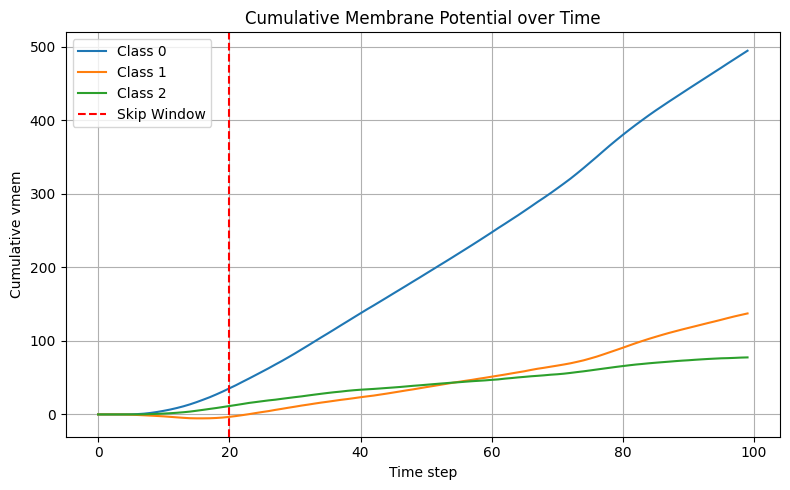

Epoch 0: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:07<00:00,  1.03it/s]

Epoch 0: Train Loss = 9.3608, Accuracy = 51.89%


  [Val] Accuracy: 64.71%
  ‚úÖ New best model saved at epoch 0 with val acc 64.71%


Epoch 1: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:04<00:00,  1.06it/s]

Epoch 1: Train Loss = 5.4051, Accuracy = 68.89%


  [Val] Accuracy: 69.25%
  ‚úÖ New best model saved at epoch 1 with val acc 69.25%


Epoch 2: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:04<00:00,  1.06it/s]

Epoch 2: Train Loss = 4.8425, Accuracy = 72.49%


  [Val] Accuracy: 72.73%
  ‚úÖ New best model saved at epoch 2 with val acc 72.73%


Epoch 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:02<00:00,  1.08it/s]

Epoch 3: Train Loss = 4.4801, Accuracy = 73.82%


  [Val] Accuracy: 74.06%
  ‚úÖ New best model saved at epoch 3 with val acc 74.06%


Epoch 4: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:02<00:00,  1.08it/s]

Epoch 4: Train Loss = 4.2661, Accuracy = 75.24%


  [Val] Accuracy: 72.99%


Epoch 5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:03<00:00,  1.07it/s]

Epoch 5: Train Loss = 4.1668, Accuracy = 75.24%


  [Val] Accuracy: 74.33%
  ‚úÖ New best model saved at epoch 5 with val acc 74.33%


Epoch 6: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:03<00:00,  1.07it/s]

Epoch 6: Train Loss = 4.0313, Accuracy = 76.99%


  [Val] Accuracy: 75.94%
  ‚úÖ New best model saved at epoch 6 with val acc 75.94%


Epoch 7: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:03<00:00,  1.06it/s]

Epoch 7: Train Loss = 4.0856, Accuracy = 76.18%


  [Val] Accuracy: 75.67%


Epoch 8: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:03<00:00,  1.07it/s]

Epoch 8: Train Loss = 4.0750, Accuracy = 76.94%


  [Val] Accuracy: 74.87%


Epoch 9: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:01<00:00,  1.09it/s]

Epoch 9: Train Loss = 3.9426, Accuracy = 76.94%


  [Val] Accuracy: 75.13%


Epoch 10: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:02<00:00,  1.08it/s]

Epoch 10: Train Loss = 3.9605, Accuracy = 77.08%


  [Val] Accuracy: 76.20%
  ‚úÖ New best model saved at epoch 10 with val acc 76.20%


Epoch 11: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:04<00:00,  1.06it/s]

Epoch 11: Train Loss = 3.9002, Accuracy = 76.47%


  [Val] Accuracy: 75.13%


Epoch 12: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:02<00:00,  1.07it/s]

Epoch 12: Train Loss = 3.8131, Accuracy = 77.65%


  [Val] Accuracy: 77.01%
  ‚úÖ New best model saved at epoch 12 with val acc 77.01%


Epoch 13: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:03<00:00,  1.07it/s]

Epoch 13: Train Loss = 3.9162, Accuracy = 76.89%


  [Val] Accuracy: 75.13%


Epoch 14: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:02<00:00,  1.08it/s]

Epoch 14: Train Loss = 3.8169, Accuracy = 78.41%


  [Val] Accuracy: 77.27%
  ‚úÖ New best model saved at epoch 14 with val acc 77.27%


Epoch 15: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:02<00:00,  1.08it/s]

Epoch 15: Train Loss = 3.8130, Accuracy = 77.56%


  [Val] Accuracy: 77.81%
  ‚úÖ New best model saved at epoch 15 with val acc 77.81%


Epoch 16: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:03<00:00,  1.07it/s]

Epoch 16: Train Loss = 3.7399, Accuracy = 77.84%


  [Val] Accuracy: 77.27%


Epoch 17: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:01<00:00,  1.08it/s]

Epoch 17: Train Loss = 3.7691, Accuracy = 77.98%


  [Val] Accuracy: 77.81%


Epoch 18: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:01<00:00,  1.09it/s]

Epoch 18: Train Loss = 3.6580, Accuracy = 78.88%


  [Val] Accuracy: 75.13%


Epoch 19: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:03<00:00,  1.07it/s]

Epoch 19: Train Loss = 3.6510, Accuracy = 78.46%


  [Val] Accuracy: 75.94%


Epoch 20: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:59<00:00,  1.11it/s]

Epoch 20: Train Loss = 3.7040, Accuracy = 78.27%


  [Val] Accuracy: 74.87%


Epoch 21: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:02<00:00,  1.07it/s]

Epoch 21: Train Loss = 3.6373, Accuracy = 78.93%


  [Val] Accuracy: 76.20%


Epoch 22: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:03<00:00,  1.07it/s]

Epoch 22: Train Loss = 3.6560, Accuracy = 78.74%


  [Val] Accuracy: 76.47%


Epoch 23: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:00<00:00,  1.10it/s]

Epoch 23: Train Loss = 3.6125, Accuracy = 78.93%


  [Val] Accuracy: 76.20%


Epoch 24: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:00<00:00,  1.10it/s]

Epoch 24: Train Loss = 3.5206, Accuracy = 79.45%


  [Val] Accuracy: 75.13%


Epoch 25: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:00<00:00,  1.10it/s]

Epoch 25: Train Loss = 3.7048, Accuracy = 78.60%


  [Val] Accuracy: 74.60%


Epoch 26: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:00<00:00,  1.10it/s]

Epoch 26: Train Loss = 3.5839, Accuracy = 79.36%


  [Val] Accuracy: 77.27%


Epoch 27: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:00<00:00,  1.09it/s]

Epoch 27: Train Loss = 3.5565, Accuracy = 78.69%


  [Val] Accuracy: 78.88%
  ‚úÖ New best model saved at epoch 27 with val acc 78.88%


Epoch 28: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.12it/s]

Epoch 28: Train Loss = 3.5240, Accuracy = 78.84%


  [Val] Accuracy: 74.87%


Epoch 29: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:59<00:00,  1.11it/s]

Epoch 29: Train Loss = 3.5435, Accuracy = 79.02%


  [Val] Accuracy: 78.07%


Epoch 30: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:59<00:00,  1.11it/s]

Epoch 30: Train Loss = 3.4470, Accuracy = 80.45%


  [Val] Accuracy: 74.06%


Epoch 31: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:00<00:00,  1.10it/s]

Epoch 31: Train Loss = 3.4779, Accuracy = 79.69%


  [Val] Accuracy: 77.27%


Epoch 32: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.11it/s]

Epoch 32: Train Loss = 3.4498, Accuracy = 79.64%


  [Val] Accuracy: 78.61%


Epoch 33: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:05<00:00,  1.05it/s]

Epoch 33: Train Loss = 3.5049, Accuracy = 79.50%


  [Val] Accuracy: 77.81%


Epoch 34: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.11it/s]

Epoch 34: Train Loss = 3.4238, Accuracy = 79.88%


  [Val] Accuracy: 76.47%


Epoch 35: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.12it/s]

Epoch 35: Train Loss = 3.3764, Accuracy = 80.73%


  [Val] Accuracy: 77.81%


Epoch 36: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.11it/s]

Epoch 36: Train Loss = 3.4672, Accuracy = 80.16%


  [Val] Accuracy: 76.74%


Epoch 37: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:57<00:00,  1.13it/s]

Epoch 37: Train Loss = 3.3381, Accuracy = 80.87%


  [Val] Accuracy: 77.54%


Epoch 38: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.11it/s]

Epoch 38: Train Loss = 3.3760, Accuracy = 81.01%


  [Val] Accuracy: 74.33%


Epoch 39: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:57<00:00,  1.12it/s]

Epoch 39: Train Loss = 3.3570, Accuracy = 80.35%


  [Val] Accuracy: 77.81%


Epoch 40: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:57<00:00,  1.12it/s]

Epoch 40: Train Loss = 3.3992, Accuracy = 80.02%


  [Val] Accuracy: 79.14%
  ‚úÖ New best model saved at epoch 40 with val acc 79.14%


Epoch 41: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.11it/s]

Epoch 41: Train Loss = 3.3976, Accuracy = 80.07%


  [Val] Accuracy: 78.88%


Epoch 42: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:57<00:00,  1.12it/s]

Epoch 42: Train Loss = 3.2993, Accuracy = 80.92%


  [Val] Accuracy: 77.54%


Epoch 43: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.12it/s]

Epoch 43: Train Loss = 3.3690, Accuracy = 80.11%


  [Val] Accuracy: 78.88%


Epoch 44: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.12it/s]

Epoch 44: Train Loss = 3.2893, Accuracy = 81.58%


  [Val] Accuracy: 72.19%


Epoch 45: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.11it/s]

Epoch 45: Train Loss = 3.2983, Accuracy = 80.30%


  [Val] Accuracy: 76.47%


Epoch 46: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:56<00:00,  1.13it/s]

Epoch 46: Train Loss = 3.3876, Accuracy = 80.87%


  [Val] Accuracy: 77.81%


Epoch 47: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:59<00:00,  1.11it/s]

Epoch 47: Train Loss = 3.3040, Accuracy = 81.01%


  [Val] Accuracy: 77.27%


Epoch 48: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:00<00:00,  1.10it/s]

Epoch 48: Train Loss = 3.2904, Accuracy = 80.97%


  [Val] Accuracy: 76.74%


Epoch 49: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:00<00:00,  1.10it/s]

Epoch 49: Train Loss = 3.2990, Accuracy = 80.97%


  [Val] Accuracy: 76.20%

üéØ Best Validation Accuracy: 79.14%


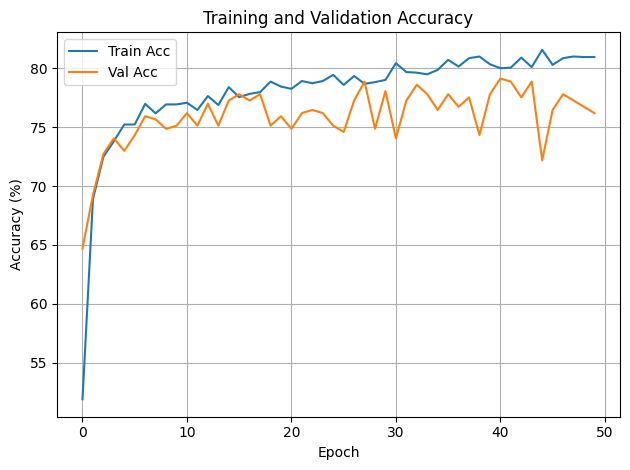

In [7]:


# ==== 3. model ====
n_channels = 16
n_classes = 3

net = SynNet(
    output="vmem",
    p_dropout=0,
    n_channels=n_channels,
    n_classes=n_classes,
    size_hidden_layers=[24, 24, 24],
    time_constants_per_layer=[24, 8, 16],
).to(device)

#checkpoint_path = "/content/drive/My Drive/SD-project/best_snn_model_with_newMSE.pth"
#net.load_state_dict(torch.load(checkpoint_path, map_location=device))
optimizer = Adam(net.parameters().astorch(), lr=1e-3)
import matplotlib.pyplot as plt
import torch.nn.functional as F

# get a sample
xb, yb = next(iter(val_dl))
xb, yb = xb.to(device), yb.to(device)

net.eval()
with torch.no_grad():
    out, _, _ = net(xb)  # [B, T, C]

# get the output
vmem = out[0].cpu().numpy()  # shape: [T, C]
cumsum_vmem = vmem.cumsum(axis=0)  # shape: [T, C]

# plt fig
plt.figure(figsize=(8, 5))
for i in range(cumsum_vmem.shape[1]):
    plt.plot(cumsum_vmem[:, i], label=f'Class {i}')

plt.axvline(x=20, color='red', linestyle='--', label='Skip Window')
plt.title('Cumulative Membrane Potential over Time')
plt.xlabel('Time step')
plt.ylabel('Cumulative vmem')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==== 4. MSE defining ====
def float_target_mse_loss(outputs, labels, num_classes, pos_val=5.0, neg_val=-1.0):
    device = outputs.device
    B = labels.shape[0]
    target = torch.full((B, num_classes), neg_val, device=device)
    target[torch.arange(B, device=device), labels] = pos_val
    return F.mse_loss(outputs, target)

# ==== 5. training ====
n_epochs = 50
best_val_acc = 0.0
best_state = None
train_acc_list = []
train_loss_list = []
val_acc_list = []
skip_window = 20
for epoch in range(n_epochs):
    net.train()
    correct = 0
    total = 0
    total_loss = 0

    for xb, yb in tqdm(train_dl, desc=f"Epoch {epoch}"):
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()

        out, _, _ = net(xb)                   # shape: [B, T, C]
        output = out[:, skip_window:, :].mean(dim=1)               # using sikp and mean value [B, C]
        loss = float_target_mse_loss(output, yb, num_classes=n_classes)

        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)
        pred = torch.argmax(output, dim=1)
        correct += (pred == yb.to(pred.device)).sum().item()
        total += yb.size(0)

    avg_loss = total_loss / total
    acc = 100 * correct / total
    train_acc_list.append(acc)
    train_loss_list.append(avg_loss)
    print(f"Epoch {epoch}: Train Loss = {avg_loss:.4f}, Accuracy = {acc:.2f}%")

    # ==== È™åËØÅ ====
    net.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for xb, yb in val_dl:
            xb, yb = xb.to(device), yb.to(device)
            out, _, _ = net(xb)
            output = out[:, skip_window:, :].mean(dim=1)                    # using sikp and mean value vmem
            pred = torch.argmax(output, dim=1)
            correct += (pred == yb.to(pred.device)).sum().item()
            total += yb.size(0)

    val_acc = 100 * correct / total
    val_acc_list.append(val_acc)
    print(f"  [Val] Accuracy: {val_acc:.2f}%")

    # ==== ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã ====
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_state = net.state_dict()
        torch.save(best_state, "/content/drive/My Drive/SD-project/best_snn_model_with_newMSE_final.pth")
        print(f"  ‚úÖ New best model saved at epoch {epoch} with val acc {val_acc:.2f}%")

print(f"\nüéØ Best Validation Accuracy: {best_val_acc:.2f}%")


# ==== 6. ÂèØËßÜÂåñÂáÜÁ°ÆÁéá ====
plt.plot(train_acc_list, label='Train Acc')
plt.plot(val_acc_list, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


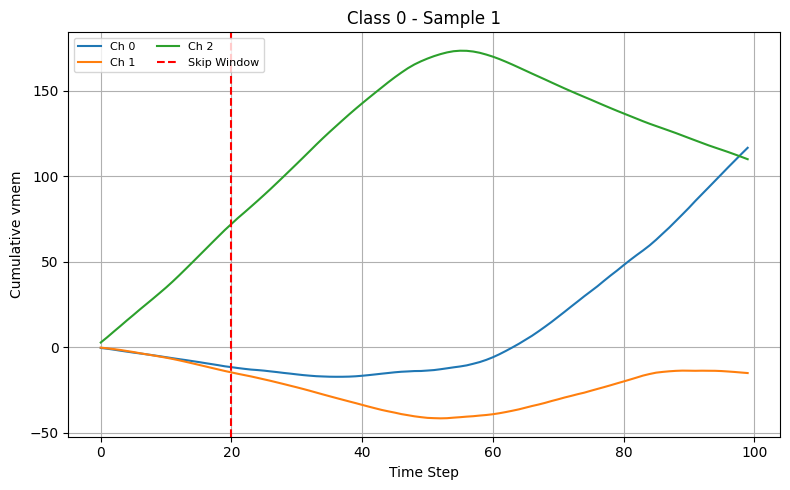

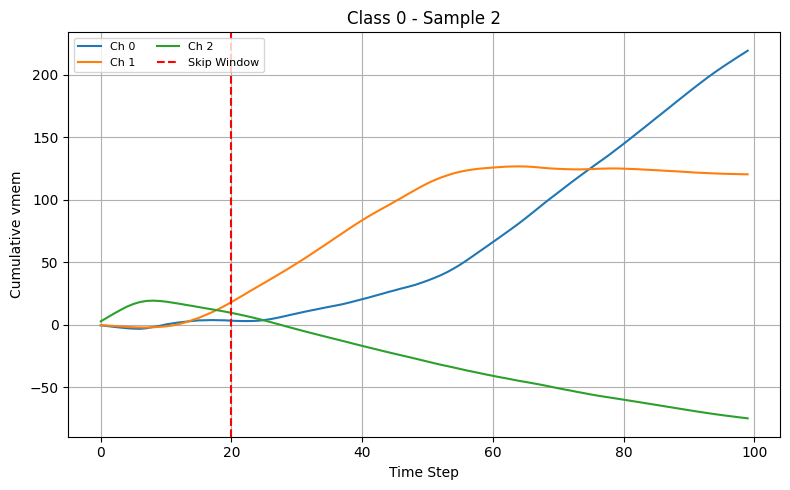

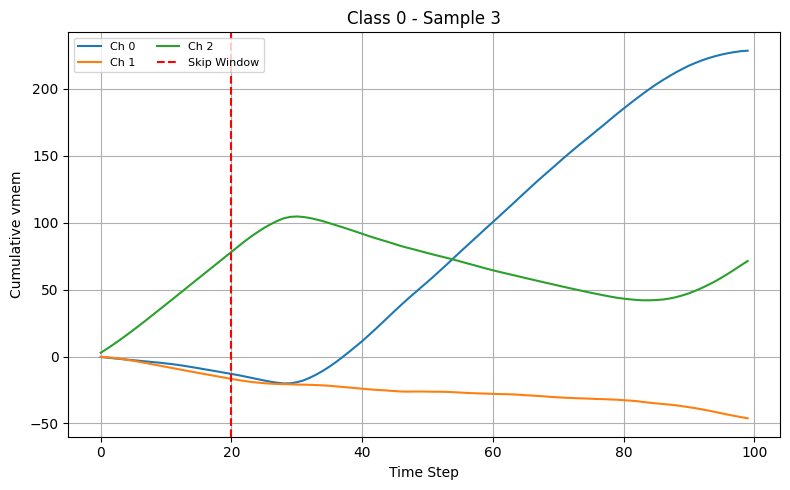

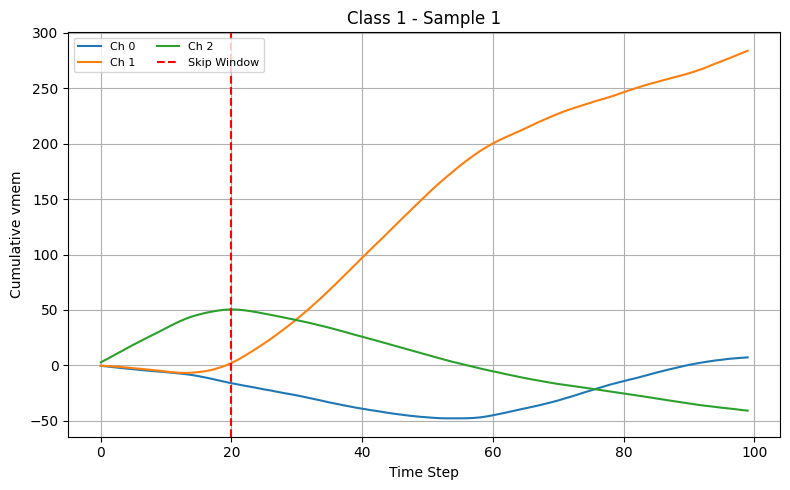

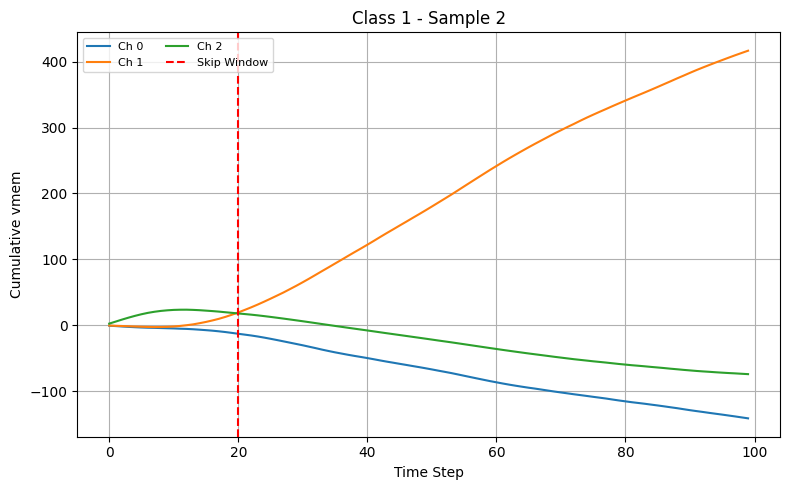

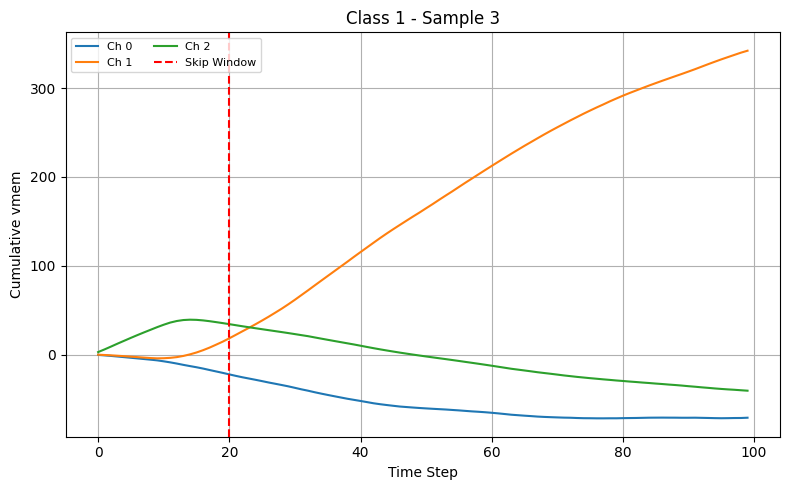

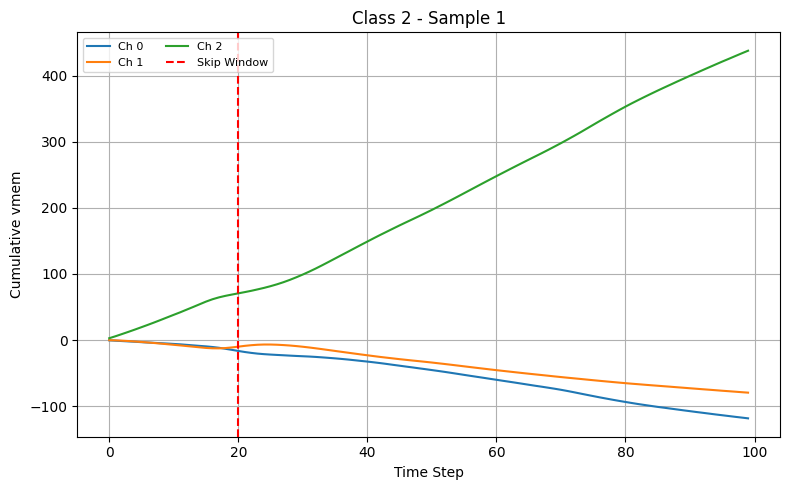

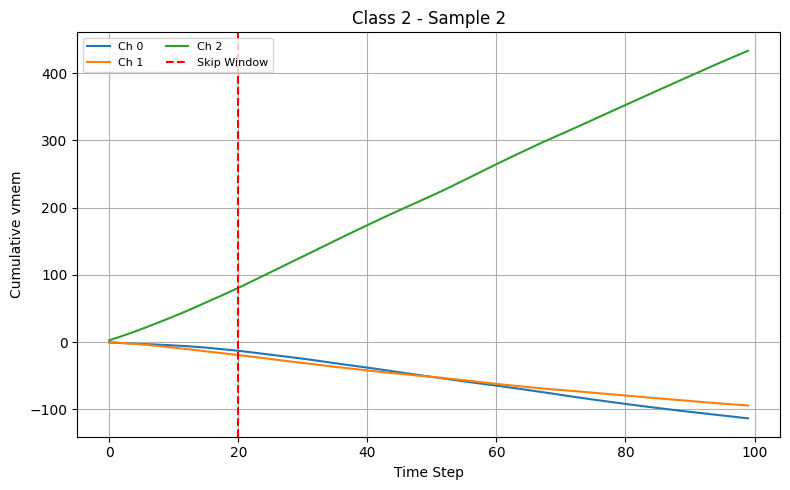

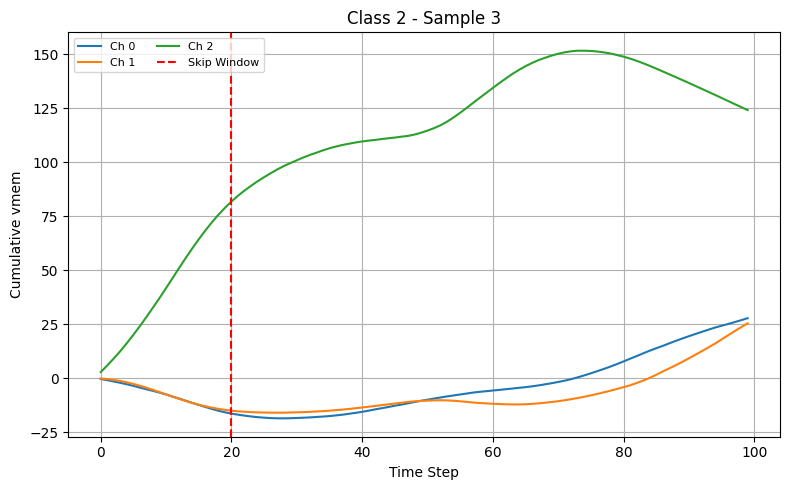

In [8]:
# outpput show case after trained
import matplotlib.pyplot as plt
import torch
import numpy as np

net.eval()
n_classes = 3
skip_window = 20
samples_per_class = 3  # ÊØèÁ±ªÂ±ïÁ§∫Âá†‰∏™Ê†∑Êú¨

# Â≠òÂÇ®ÊØèÁ±ªÁöÑÊ†∑Êú¨
vmem_by_class = {i: [] for i in range(n_classes)}

with torch.no_grad():
    for xb, yb in val_dl:
        xb, yb = xb.to(device), yb.to(device)
        out, _, _ = net(xb)  # [B, T, C]

        for i in range(xb.size(0)):
            label = int(yb[i].item())
            if len(vmem_by_class[label]) < samples_per_class:
                vmem = out[i].cpu().numpy()  # shape: [T, C]
                cumsum_vmem = vmem.cumsum(axis=0)
                vmem_by_class[label].append(cumsum_vmem)

        if all(len(vmem_by_class[i]) >= samples_per_class for i in range(n_classes)):
            break  # Êî∂ÈõÜÂ§ü‰∫ÜÂ∞±ÂÅúÊ≠¢

# === ÂàÜÂõæÁªòÂà∂ÊØè‰∏™Ê†∑Êú¨ ===
for cls in range(n_classes):
    for idx, cumsum_vmem in enumerate(vmem_by_class[cls]):
        plt.figure(figsize=(8, 5))
        for ch in range(cumsum_vmem.shape[1]):
            plt.plot(cumsum_vmem[:, ch], label=f'Ch {ch}')
        plt.axvline(x=skip_window, color='red', linestyle='--', label='Skip Window')
        plt.title(f'Class {cls} - Sample {idx+1}')
        plt.xlabel('Time Step')
        plt.ylabel('Cumulative vmem')
        plt.grid(True)
        plt.legend(ncol=2, fontsize=8, loc='upper left')
        plt.tight_layout()
        plt.show()


In [9]:
X_test = torch.from_numpy(np.load("/content/drive/My Drive/SD-project/data/newdata/X_test.npy")).float()
y_test = torch.from_numpy(np.load("/content/drive/My Drive/SD-project/data/newdata/y_test.npy")).long()

test_ds = TensorDataset(X_test, y_test)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False, drop_last=True, pin_memory=True, num_workers=6)

import matplotlib.pyplot as plt
import torch.nn.functional as F

# Ëé∑Âèñ‰∏Ä‰∏™Ê†∑Êú¨
xb, yb = next(iter(test_dl))
xb, yb = xb.to(device), yb.to(device)

net.eval()
with torch.no_grad():
    out, _, _ = net(xb)  # [B, T, C]

# ÂèñÁ¨¨‰∏Ä‰∏™Ê†∑Êú¨ÁöÑËæìÂá∫ÔºàB=1Ôºâ
vmem = out[0].cpu().numpy()  # shape: [T, C]
cumsum_vmem = vmem.cumsum(axis=0)  # shape: [T, C]

net.eval()
correct = 0
total = 0

with torch.no_grad():
    for xb, yb in val_dl:
            xb, yb = xb.to(device), yb.to(device)
            out, _, _ = net(xb)
            output = out[:, skip_window:, :].mean(dim=1)                    # ‰ªçÁÑ∂‰ΩøÁî®ÊúÄÂêé‰∏ÄÂ∏ß vmem
            pred = torch.argmax(output, dim=1)
            correct += (pred == yb.to(pred.device)).sum().item()
            total += yb.size(0)

val_acc = 100 * correct / total
val_acc_list.append(val_acc)
print(f"  [Val] Accuracy: {val_acc:.2f}%")

  [Val] Accuracy: 76.20%


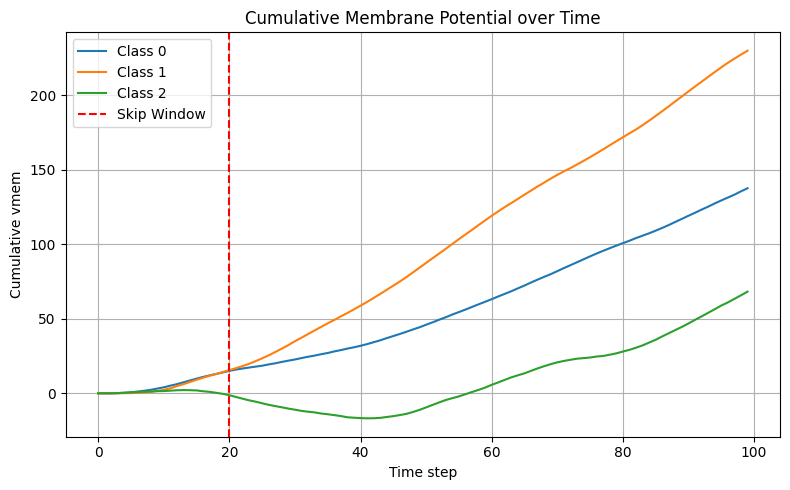

Epoch 0: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:02<00:00,  1.08it/s]

Epoch 0: Train Loss = 6.3941, Accuracy = 61.32%


  [Val] Accuracy: 67.11%
  ‚úÖ New best model saved at epoch 0 with val acc 67.11%


Epoch 1: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:59<00:00,  1.10it/s]

Epoch 1: Train Loss = 4.9638, Accuracy = 70.60%


  [Val] Accuracy: 70.86%
  ‚úÖ New best model saved at epoch 1 with val acc 70.86%


Epoch 2: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:00<00:00,  1.10it/s]

Epoch 2: Train Loss = 5.1105, Accuracy = 68.51%


  [Val] Accuracy: 70.05%


Epoch 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:56<00:00,  1.13it/s]

Epoch 3: Train Loss = 4.5035, Accuracy = 73.34%


  [Val] Accuracy: 69.25%


Epoch 4: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.12it/s]

Epoch 4: Train Loss = 4.5252, Accuracy = 72.21%


  [Val] Accuracy: 72.46%
  ‚úÖ New best model saved at epoch 4 with val acc 72.46%


Epoch 5: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:59<00:00,  1.10it/s]

Epoch 5: Train Loss = 4.3714, Accuracy = 74.38%


  [Val] Accuracy: 75.40%
  ‚úÖ New best model saved at epoch 5 with val acc 75.40%


Epoch 6: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:56<00:00,  1.14it/s]

Epoch 6: Train Loss = 4.3008, Accuracy = 74.10%


  [Val] Accuracy: 73.80%


Epoch 7: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.11it/s]

Epoch 7: Train Loss = 4.1311, Accuracy = 75.90%


  [Val] Accuracy: 74.06%


Epoch 8: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.11it/s]

Epoch 8: Train Loss = 4.0949, Accuracy = 75.57%


  [Val] Accuracy: 75.67%
  ‚úÖ New best model saved at epoch 8 with val acc 75.67%


Epoch 9: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:59<00:00,  1.11it/s]

Epoch 9: Train Loss = 4.0492, Accuracy = 75.95%


  [Val] Accuracy: 76.20%
  ‚úÖ New best model saved at epoch 9 with val acc 76.20%


Epoch 10: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:58<00:00,  1.12it/s]

Epoch 10: Train Loss = 3.8983, Accuracy = 77.04%


  [Val] Accuracy: 74.06%


Epoch 11: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [01:59<00:00,  1.11it/s]

Epoch 11: Train Loss = 3.9160, Accuracy = 76.89%


  [Val] Accuracy: 75.94%


Epoch 12: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 132/132 [02:00<00:00,  1.10it/s]

Epoch 12: Train Loss = 3.8851, Accuracy = 77.41%


  [Val] Accuracy: 76.74%
  ‚úÖ New best model saved at epoch 12 with val acc 76.74%


Epoch 13:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 71/132 [01:03<00:50,  1.21it/s]

In [ ]:


# ==== 3. ÊûÑÂª∫Ê®°Âûã ====
n_channels = 16
n_classes = 3

net = SynNet(
    output="vmem",
    p_dropout=0,
    n_channels=n_channels,
    n_classes=n_classes,
    size_hidden_layers=[24, 24, 24],
    time_constants_per_layer=[2, 4, 8],
).to(device)

#checkpoint_path = "/content/drive/My Drive/SD-project/best_snn_model_with_newMSE.pth"
#net.load_state_dict(torch.load(checkpoint_path, map_location=device))
optimizer = Adam(net.parameters().astorch(), lr=1e-3)
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Ëé∑Âèñ‰∏Ä‰∏™Ê†∑Êú¨
xb, yb = next(iter(val_dl))
xb, yb = xb.to(device), yb.to(device)

net.eval()
with torch.no_grad():
    out, _, _ = net(xb)  # [B, T, C]

# ÂèñÁ¨¨‰∏Ä‰∏™Ê†∑Êú¨ÁöÑËæìÂá∫ÔºàB=1Ôºâ
vmem = out[0].cpu().numpy()  # shape: [T, C]
cumsum_vmem = vmem.cumsum(axis=0)  # shape: [T, C]

# ÁªòÂõæ
plt.figure(figsize=(8, 5))
for i in range(cumsum_vmem.shape[1]):
    plt.plot(cumsum_vmem[:, i], label=f'Class {i}')

plt.axvline(x=20, color='red', linestyle='--', label='Skip Window')
plt.title('Cumulative Membrane Potential over Time')
plt.xlabel('Time step')
plt.ylabel('Cumulative vmem')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==== 4. ÂÆö‰πâÊçüÂ§±ÂáΩÊï∞ ====
def float_target_mse_loss(outputs, labels, num_classes, pos_val=5.0, neg_val=-1.0):
    device = outputs.device
    B = labels.shape[0]
    target = torch.full((B, num_classes), neg_val, device=device)
    target[torch.arange(B, device=device), labels] = pos_val
    return F.mse_loss(outputs, target)

# ==== 5. ÂºÄÂßãËÆ≠ÁªÉ ====
n_epochs = 50
best_val_acc = 0.0
best_state = None
train_acc_list = []
train_loss_list = []
val_acc_list = []
skip_window = 20
for epoch in range(n_epochs):
    net.train()
    correct = 0
    total = 0
    total_loss = 0

    for xb, yb in tqdm(train_dl, desc=f"Epoch {epoch}"):
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()

        out, _, _ = net(xb)                   # shape: [B, T, C]
        output = out[:, skip_window:, :].mean(dim=1)               # using sikp and mean value [B, C]
        loss = float_target_mse_loss(output, yb, num_classes=n_classes)

        loss.backward()
        optimizer.step()

        total_loss += loss.item() * xb.size(0)
        pred = torch.argmax(output, dim=1)
        correct += (pred == yb.to(pred.device)).sum().item()
        total += yb.size(0)

    avg_loss = total_loss / total
    acc = 100 * correct / total
    train_acc_list.append(acc)
    train_loss_list.append(avg_loss)
    print(f"Epoch {epoch}: Train Loss = {avg_loss:.4f}, Accuracy = {acc:.2f}%")

    # ==== È™åËØÅ ====
    net.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for xb, yb in val_dl:
            xb, yb = xb.to(device), yb.to(device)
            out, _, _ = net(xb)
            output = out[:, skip_window:, :].mean(dim=1)                    # ‰ªçÁÑ∂‰ΩøÁî®ÊúÄÂêé‰∏ÄÂ∏ß vmem
            pred = torch.argmax(output, dim=1)
            correct += (pred == yb.to(pred.device)).sum().item()
            total += yb.size(0)

    val_acc = 100 * correct / total
    val_acc_list.append(val_acc)
    print(f"  [Val] Accuracy: {val_acc:.2f}%")

    # ==== ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã ====
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_state = net.state_dict()
        torch.save(best_state, "/content/drive/My Drive/SD-project/best_snn_model_with_newMSE_final.pth")
        print(f"  ‚úÖ New best model saved at epoch {epoch} with val acc {val_acc:.2f}%")

print(f"\nüéØ Best Validation Accuracy: {best_val_acc:.2f}%")


# ==== 6. ÂèØËßÜÂåñÂáÜÁ°ÆÁéá ====
plt.plot(train_acc_list, label='Train Acc')
plt.plot(val_acc_list, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
